In [161]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as plotl
import plotly.graph_objs as go
import plotly.tools as tls
import pylab as pl
import json
from mpl_toolkits.mplot3d import Axes3D
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
import seaborn as sns
sns.set(color_codes=True)
plt.style.use('ggplot')
pd.set_option("display.max_rows", 2000)
#http://stackoverflow.com/questions/27504870/sklearn-kmeans-get-class-centroid-labels-and-reference-to-a-dataset
#http://mlwhiz.com/blog/2015/09/13/seaborn_visualizations/
#https://bespokeblog.wordpress.com/2011/07/07/basic-data-plotting-with-matplotlib-part-2-lines-points-formatting/

In [ ]:
raw_data = pd.read_json('studentBehaviorInfoOver40Class_1213.json')
raw = pd.DataFrame(raw_data)
raw = raw[raw['memberId']==123347] 
scores=[]

def scores(scores):
    for s in scores:
        scores.append(s)
        
raw['listenScore'].apply(scores)

for n in scores:
        print n

In [157]:
data_from_json = pd.read_json('prepped-wo-section.json')
data_to_frame = pd.DataFrame(data_from_json)
data_to_frame = data_to_frame.fillna(0)

In [158]:
data_to_frame['user_video_sequence'] = data_to_frame.groupby(['user']).cumcount()+1
#data_to_frame[data_to_frame['user']==82882]
#data_to_frame[['postId','user', 'sequence_path_number']]
#data_to_frame.groupby('user').size().sort_values(ascending=[0])
data_to_frame[data_to_frame['user']==113908]

,avg_incomplete,avg_score,avg_words_saved,num_words_saved,postId,user,video_vocab_count,user_video_sequence
53127,0.000000,20.200000,0.205645,51,3913,113908,248,1
53128,0.000000,16.000000,0.015625,1,11855,113908,64,2
53129,0.000000,47.000000,0.101010,10,9770,113908,99,3
53130,0.000000,48.000000,0.071895,11,5186,113908,153,4
53131,0.000000,11.000000,0.055046,12,10565,113908,218,5
53132,0.000000,45.000000,0.118421,9,10564,113908,76,6
53133,0.000000,28.666667,0.097902,14,9851,113908,143,7
53134,0.000000,7.000000,0.020305,4,10303,113908,197,8
53135,0.000000,8.000000,0.000000,0,12214,113908,74,9
53136,0.000000,28.000000,0.009615,1,9771,113908,104,10


In [217]:
# Initialize the model with 2 parameters -- number of clusters and random state.
kmeans_model = KMeans(n_clusters=3,init='k-means++',random_state=0)
#data_to_frame = data_to_frame[data_to_frame['postId'] != 3913]
good_columns = data_to_frame[['avg_incomplete']] #data_to_frame._get_numeric_data()

# Fit the model using the good columns.
kmeans_model.fit_predict(good_columns)
# Get the cluster assignments.
labels = kmeans_model.labels_
data2D = kmeans_model.transform(good_columns)

# Create a PCA model.
#pca_2 = PCA(2)
# Fit the PCA model on the numeric columns from earlier.
#plot_columns = pca_2.fit_transform(good_columns)
# Make a scatter plot of each game, shaded according to cluster assignment.
#plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
# Show the plot.

df_processed = data_to_frame.copy()
df_processed['Cluster_Class'] = pd.Series(labels, index=df_processed.index)
df_processed.head(10)
df_processed.groupby('user').size().shape # count unique users
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, labels))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000


In [213]:
#http://stackoverflow.com/questions/23394476/keep-other-columns-when-using-min-with-groupby
#get index of first video sequence where skip ratio is 0 for every user (smallest skip ratio)
#df_processed.loc[df_processed.groupby('user')["avg_incomplete"].idxmin()]
df_processed[df_processed['Cluster_Class'] == 2]

,avg_incomplete,avg_score,avg_words_saved,num_words_saved,postId,user,video_vocab_count,user_video_sequence,Cluster_Class
6,0.333333,78.000000,0.138686,19,7126,50679,137,7,2
17,0.666667,85.000000,0.150685,33,8547,22808,219,10,2
39,0.500000,90.500000,0.267760,49,8859,50791,183,21,2
75,0.600000,70.500000,0.187739,49,10543,51225,261,7,2
142,0.533333,84.571429,0.087794,41,8456,14632,467,16,2
177,0.500000,70.000000,0.080882,11,13187,51745,136,14,2
195,0.346154,94.764706,0.008538,8,4220,3987,937,17,2
213,0.666667,91.000000,0.105000,21,50,51936,200,18,2
224,0.600000,96.500000,0.024390,6,2093,39760,246,10,2
253,0.333333,78.500000,0.131195,45,13388,43274,343,9,2


In [212]:
cluster2 = df_processed[df_processed['Cluster_Class'] == 2] 
cluster2[cluster2['user_video_sequence']]

,avg_incomplete,avg_score,avg_words_saved,num_words_saved,postId,user,video_vocab_count,user_video_sequence,Cluster_Class
6,0.333333,78.000000,0.138686,19,7126,50679,137,7,2
17,0.666667,85.000000,0.150685,33,8547,22808,219,10,2
39,0.500000,90.500000,0.267760,49,8859,50791,183,21,2
75,0.600000,70.500000,0.187739,49,10543,51225,261,7,2
142,0.533333,84.571429,0.087794,41,8456,14632,467,16,2
177,0.500000,70.000000,0.080882,11,13187,51745,136,14,2
195,0.346154,94.764706,0.008538,8,4220,3987,937,17,2
213,0.666667,91.000000,0.105000,21,50,51936,200,18,2
224,0.600000,96.500000,0.024390,6,2093,39760,246,10,2
253,0.333333,78.500000,0.131195,45,13388,43274,343,9,2


(54989L, 3L)


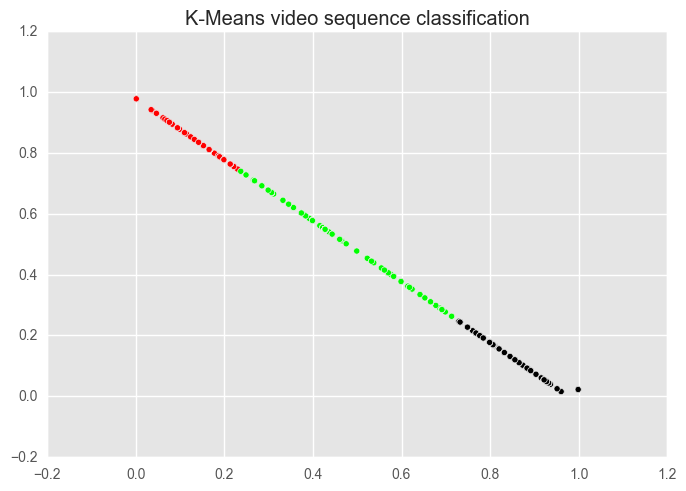

In [218]:
print data2D.shape

LABEL_COLOR_MAP = {0 : 'red',
                   1 : 'black',
                   2 : 'lime',
                   }
label_color = [LABEL_COLOR_MAP[l] for l in labels]
plt.scatter(data2D[:,0], data2D[:,1], marker='o', c=label_color)
plt.title('K-Means video sequence classification')
#pl.legend(['Setosa', 'Versicolor', 'Virginica'])
#plt.legend((label_color),numpoints=1, loc='upper right')   
plt.show()
 




Cluster_Class
0    49229
1     4188
2     1572
dtype: int64


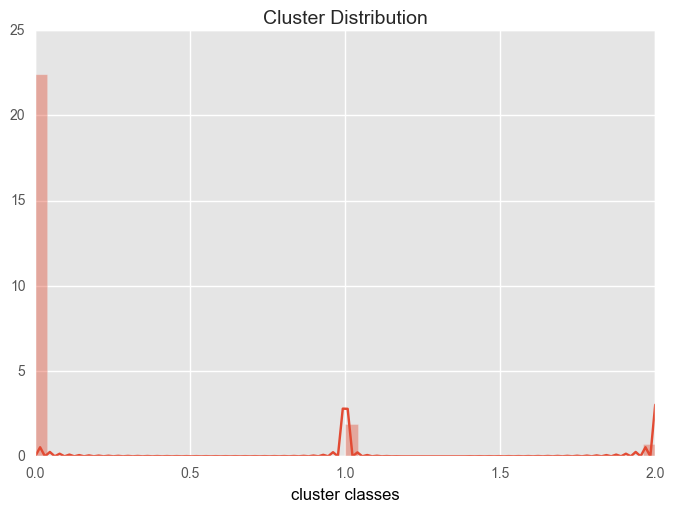

In [219]:
print df_processed.groupby(['Cluster_Class']).size()

c1 = sns.distplot(df_processed['Cluster_Class'])
c1.axes.set_title('Cluster Distribution', fontsize=14)
c1.set_xlabel("cluster classes",color="black")

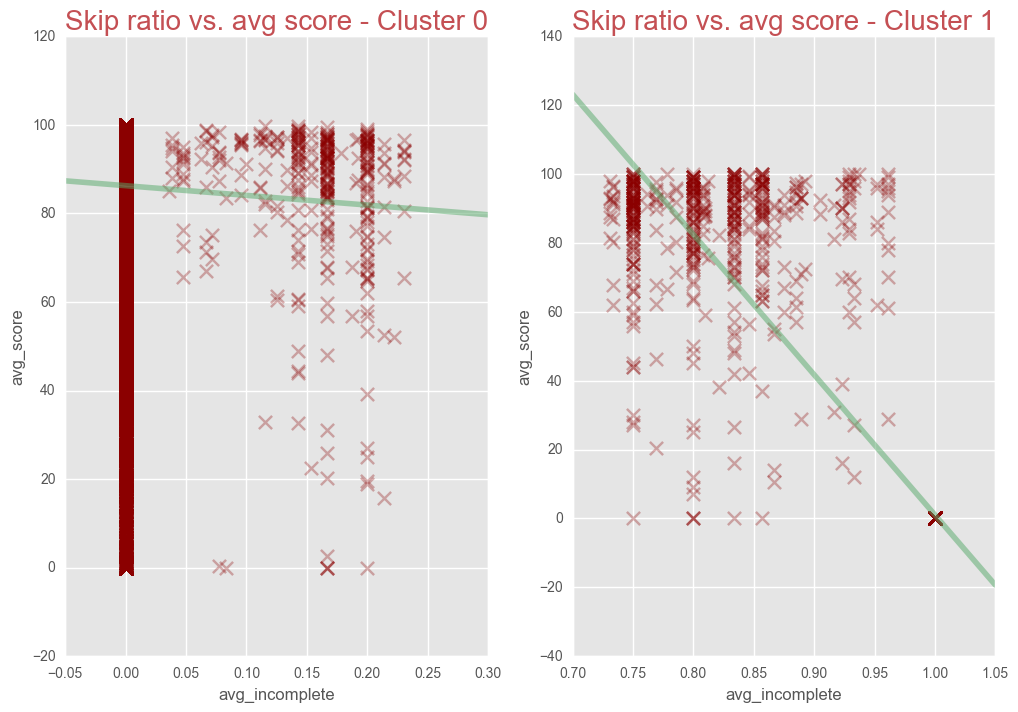

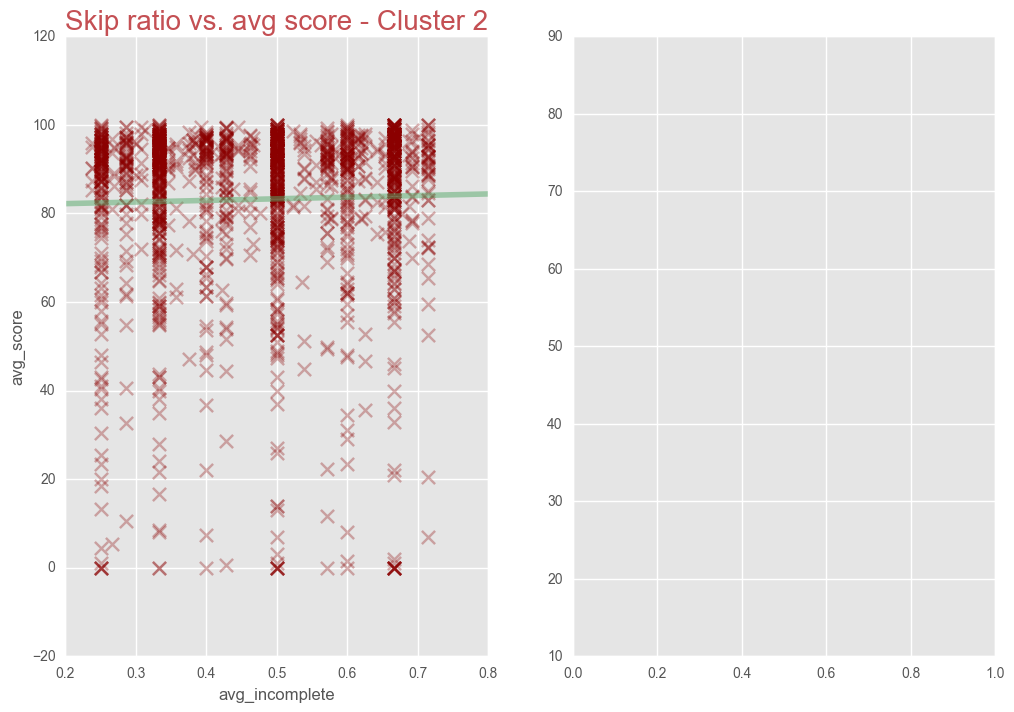

In [204]:
fig, axs = plt.subplots(1,2,figsize=(15, 5))
fig2, axs2 = plt.subplots(1,2,figsize=(15, 5))

x0=df_processed_cluster0['avg_incomplete']
y0=df_processed_cluster0['avg_score']
g = sns.regplot(x=x0, y=y0, data=df_processed_cluster0, ci = False, 
    scatter_kws={"color":"darkred","alpha":0.3,"s":90},
    line_kws={"color":"g","alpha":0.5,"lw":4},marker="x",ax=axs[0])
g.figure.set_size_inches(12,8)
g.axes.set_title('Skip ratio vs. avg score - Cluster 0', fontsize=20,color="r")

x1=df_processed_cluster1['avg_incomplete']
y1=df_processed_cluster1['avg_score']
g = sns.regplot(x=x1, y=y1, data=df_processed_cluster1, ci = False, 
    scatter_kws={"color":"darkred","alpha":0.3,"s":90},
    line_kws={"color":"g","alpha":0.5,"lw":4},marker="x",ax=axs[1])
g.figure.set_size_inches(12,8)
g.axes.set_title('Skip ratio vs. avg score - Cluster 1', fontsize=20,color="r")

x2=df_processed_cluster2['avg_incomplete']
y2=df_processed_cluster2['avg_score']
g = sns.regplot(x=x2, y=y2, data=df_processed_cluster2, ci = False, 
    scatter_kws={"color":"darkred","alpha":0.3,"s":90},
    line_kws={"color":"g","alpha":0.5,"lw":4},marker="x",ax=axs2[0])
g.figure.set_size_inches(12,8)
g.axes.set_title('Skip ratio vs. avg score - Cluster 2', fontsize=20,color="r")

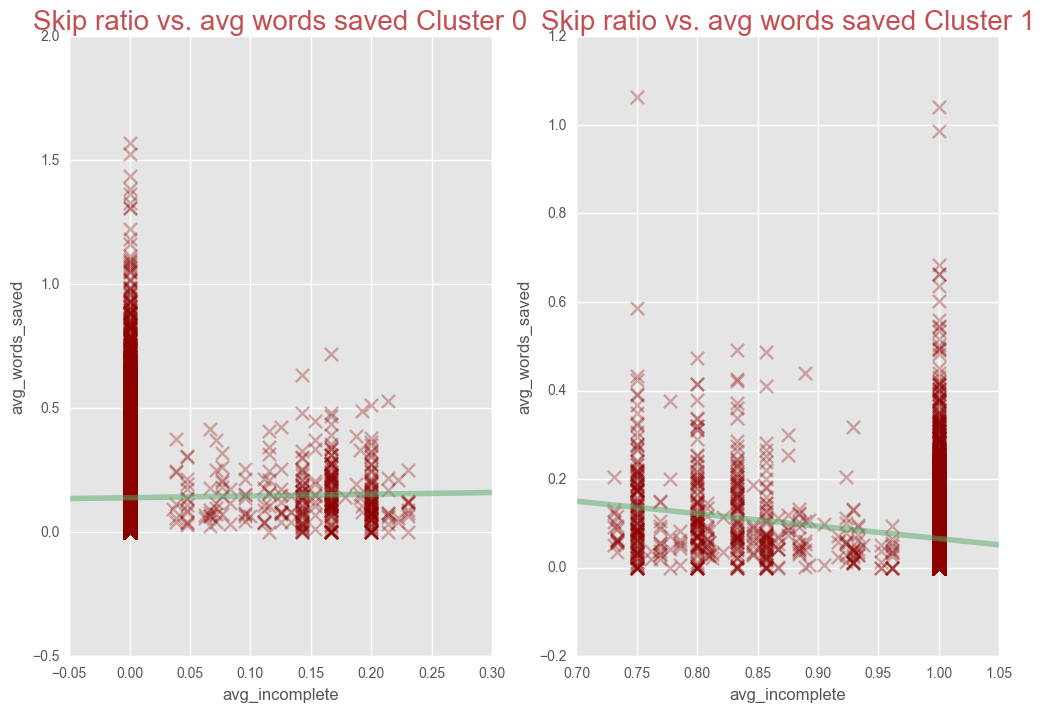

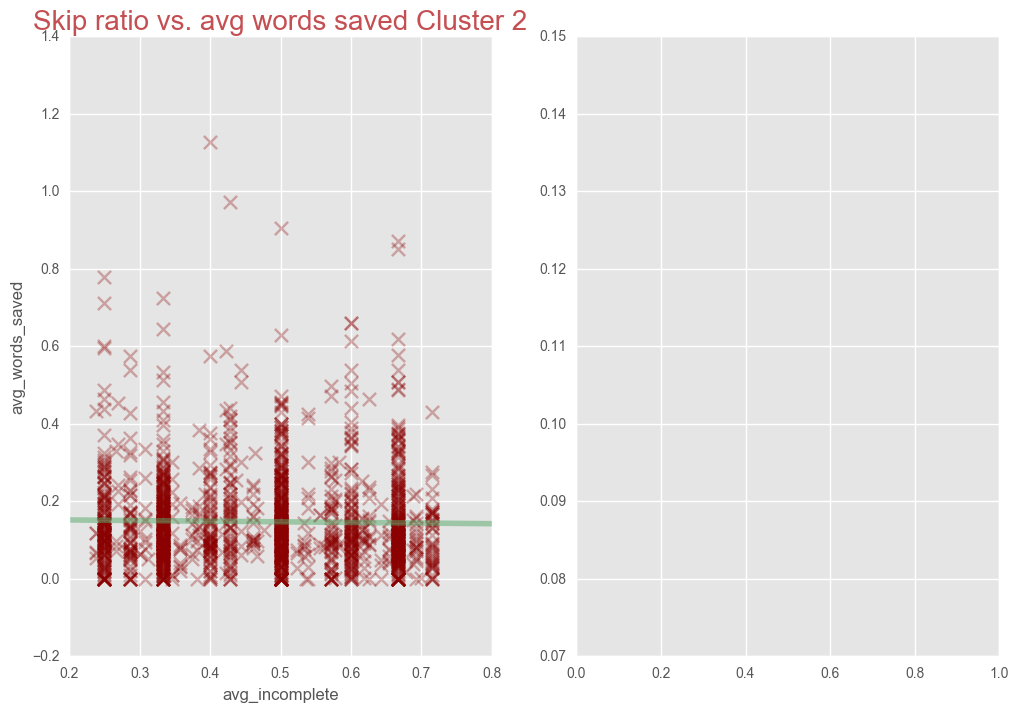

In [203]:
fig, axs = plt.subplots(1,2,figsize=(15, 5))
fig2, axs2 = plt.subplots(1,2,figsize=(15, 5))

x0=df_processed_cluster0['avg_incomplete']
y0=df_processed_cluster0['avg_words_saved']
g = sns.regplot(x=x0, y=y0, data=df_processed_cluster0, ci = False, 
    scatter_kws={"color":"darkred","alpha":0.3,"s":90},
    line_kws={"color":"g","alpha":0.5,"lw":4},marker="x",ax=axs[0])
g.figure.set_size_inches(12,8)
g.axes.set_title('Skip ratio vs. avg words saved Cluster 0', fontsize=20,color="r")

x1=df_processed_cluster1['avg_incomplete']
y1=df_processed_cluster1['avg_words_saved']
g = sns.regplot(x=x1, y=y1, data=df_processed_cluster1, ci = False, 
    scatter_kws={"color":"darkred","alpha":0.3,"s":90},
    line_kws={"color":"g","alpha":0.5,"lw":4},marker="x",ax=axs[1])
g.figure.set_size_inches(12,8)
g.axes.set_title('Skip ratio vs. avg words saved Cluster 1', fontsize=20,color="r")

x2=df_processed_cluster2['avg_incomplete']
y2=df_processed_cluster2['avg_words_saved']
g = sns.regplot(x=x2, y=y2, data=df_processed_cluster2, ci = False, 
    scatter_kws={"color":"darkred","alpha":0.3,"s":90},
    line_kws={"color":"g","alpha":0.5,"lw":4},marker="x",ax=axs2[0])
g.figure.set_size_inches(12,8)
g.axes.set_title('Skip ratio vs. avg words saved Cluster 2', fontsize=20,color="r")

In [60]:
print df_processed.corr()["avg_incomplete"]
print "\n"
print df_processed_cluster0.corr()["avg_incomplete"]
print "\n"
print df_processed_cluster1.corr()["avg_incomplete"]
print "\n"
print df_processed_cluster2.corr()["avg_incomplete"]

avg_incomplete         1.000000
avg_score             -0.036088
avg_words_saved       -0.152343
num_words_saved       -0.091128
postId                 0.104493
user                   0.048285
video_vocab_count      0.098339
user_video_sequence    0.122945
Cluster_Class          0.801089
Name: avg_incomplete, dtype: float64


avg_incomplete         1.000000
avg_score             -0.017386
avg_words_saved        0.008478
num_words_saved        0.069179
postId                -0.010860
user                   0.005692
video_vocab_count      0.114524
user_video_sequence    0.013449
Cluster_Class               NaN
Name: avg_incomplete, dtype: float64


avg_incomplete         1.000000
avg_score             -0.055190
avg_words_saved       -0.194650
num_words_saved       -0.398190
postId                 0.120654
user                  -0.002893
video_vocab_count     -0.232455
user_video_sequence    0.054178
Cluster_Class               NaN
Name: avg_incomplete, dtype: float64


avg_incomplete     

In [53]:
## to copy file to json
#results = df_processed_cluster2[df_processed_cluster2['avg_incomplete'] > 0.3].to_dict('records')
#print json.dumps(results, indent=4)# .to_json('cluster_2_user_video_sequqnces.json', orient='records')
df_processed_cluster2[df_processed_cluster2['avg_incomplete'] > 0.3].shape

(1343, 9)

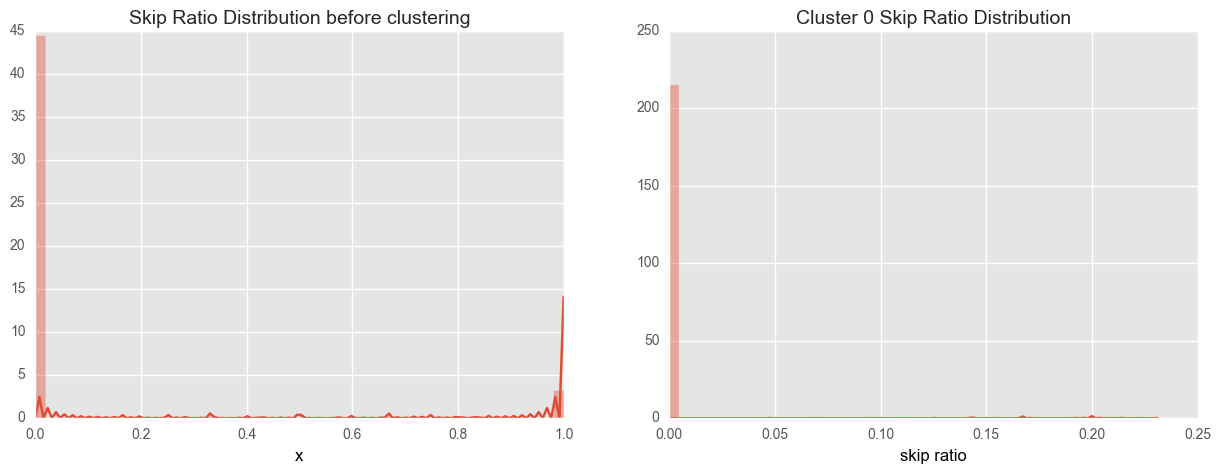

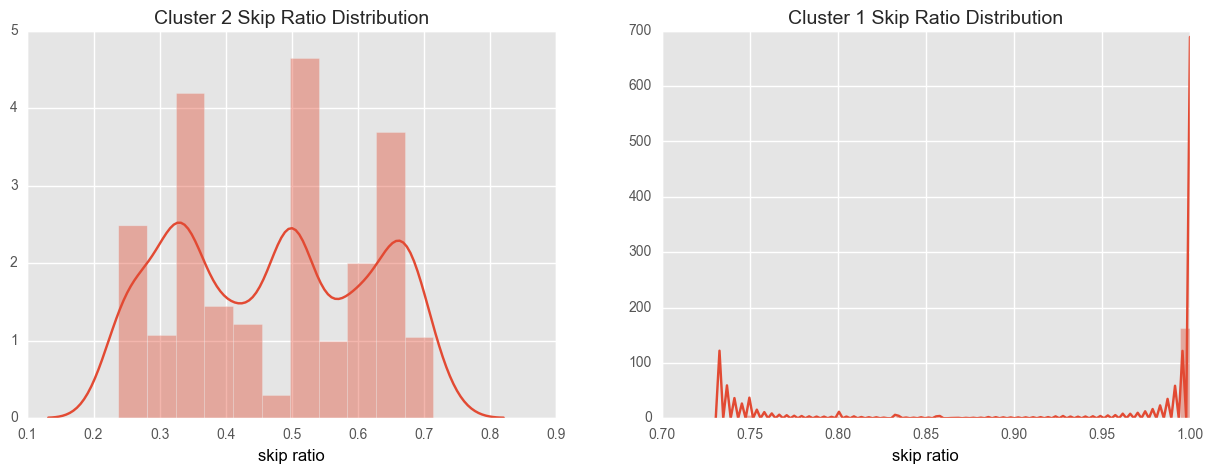

In [194]:
fig, axs = plt.subplots(1,2,figsize=(15, 5))
fig2, axs2 = plt.subplots(1,2,figsize=(15, 5))

c0 = sns.distplot(df_processed['avg_incomplete'], ax=axs[0])
c0.axes.set_title('Skip Ratio Distribution before clustering', fontsize=14)
c0.set_xlabel("x",color="black")

df_processed_cluster0 = df_processed[df_processed['Cluster_Class'] == 0]
c0 = sns.distplot(df_processed_cluster0['avg_incomplete'], ax=axs[1])
c0.axes.set_title('Cluster 0 Skip Ratio Distribution', fontsize=14)
c0.set_xlabel("skip ratio",color="black")

df_processed_cluster2 = df_processed[df_processed['Cluster_Class'] == 2]
c2 = sns.distplot(df_processed_cluster2['avg_incomplete'],ax=axs2[0])
c2.axes.set_title('Cluster 2 Skip Ratio Distribution', fontsize=14)
c2.set_xlabel("skip ratio",color="black")

df_processed_cluster1 = df_processed[df_processed['Cluster_Class'] == 1]
c1 = sns.distplot(df_processed_cluster1['avg_incomplete'], ax=axs2[1])
c1.axes.set_title('Cluster 1 Skip Ratio Distribution', fontsize=14)
c1.set_xlabel("skip ratio",color="black")

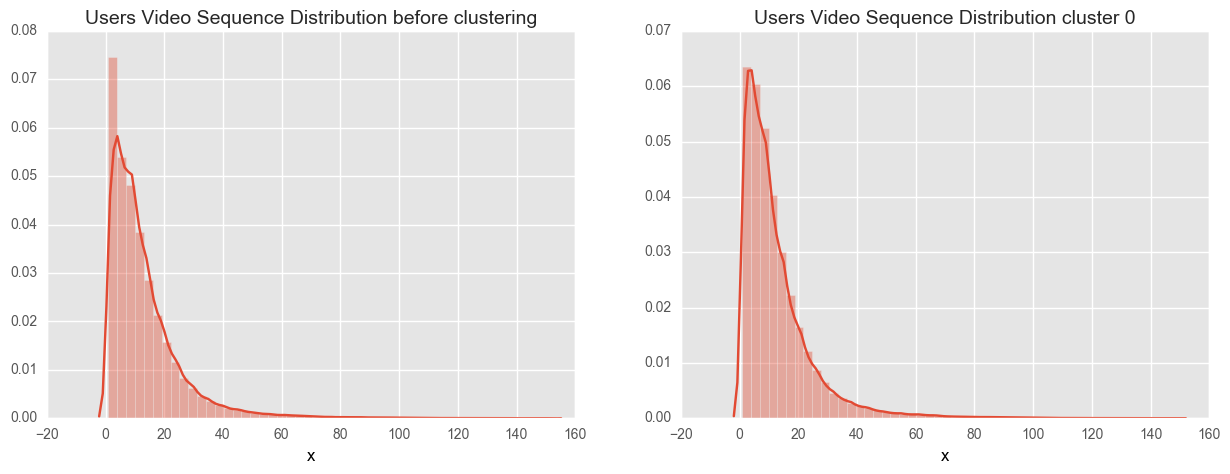

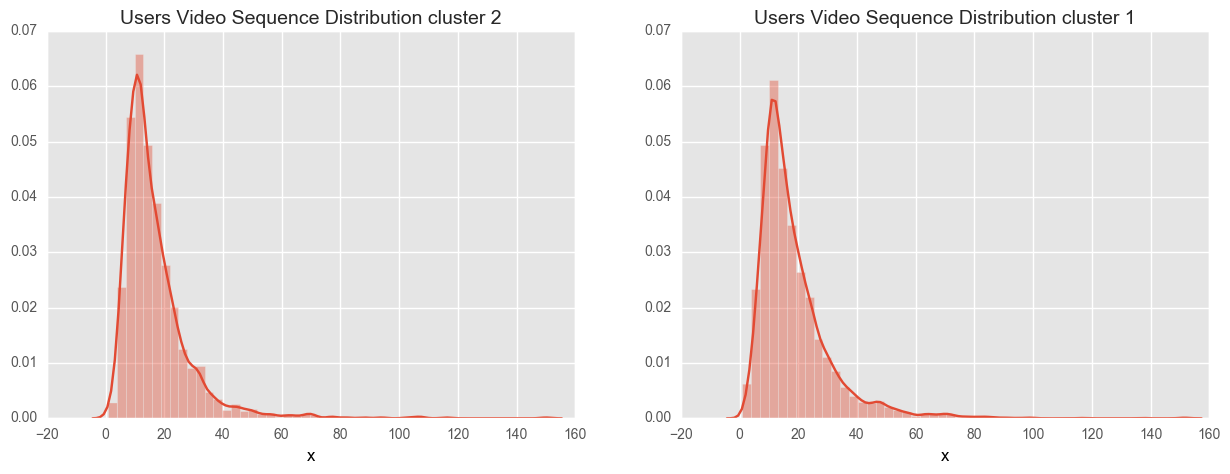

In [185]:
# every user starts at sequence 1 and most users have up to about 20 video sequences

fig, axs = plt.subplots(1,2,figsize=(15, 5))
fig2, axs2 = plt.subplots(1,2,figsize=(15, 5))

c0 = sns.distplot(df_processed['user_video_sequence'], ax=axs[0])
c0.axes.set_title('Users Video Sequence Distribution before clustering', fontsize=14)
c0.set_xlabel("x",color="black")

c0 = sns.distplot(df_processed_cluster0['user_video_sequence'], ax=axs[1])
c0.axes.set_title('Users Video Sequence Distribution cluster 0', fontsize=14)
c0.set_xlabel("x",color="black")

c0 = sns.distplot(df_processed_cluster2['user_video_sequence'], ax=axs2[0])
c0.axes.set_title('Users Video Sequence Distribution cluster 2', fontsize=14)
c0.set_xlabel("x",color="black")

c0 = sns.distplot(df_processed_cluster1['user_video_sequence'], ax=axs2[1])
c0.axes.set_title('Users Video Sequence Distribution cluster 1', fontsize=14)
c0.set_xlabel("x",color="black")


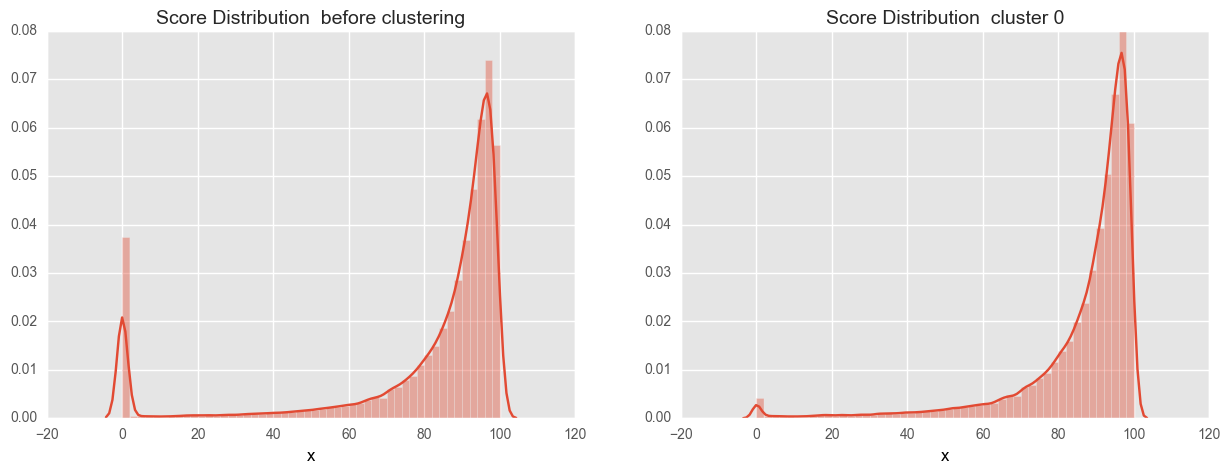

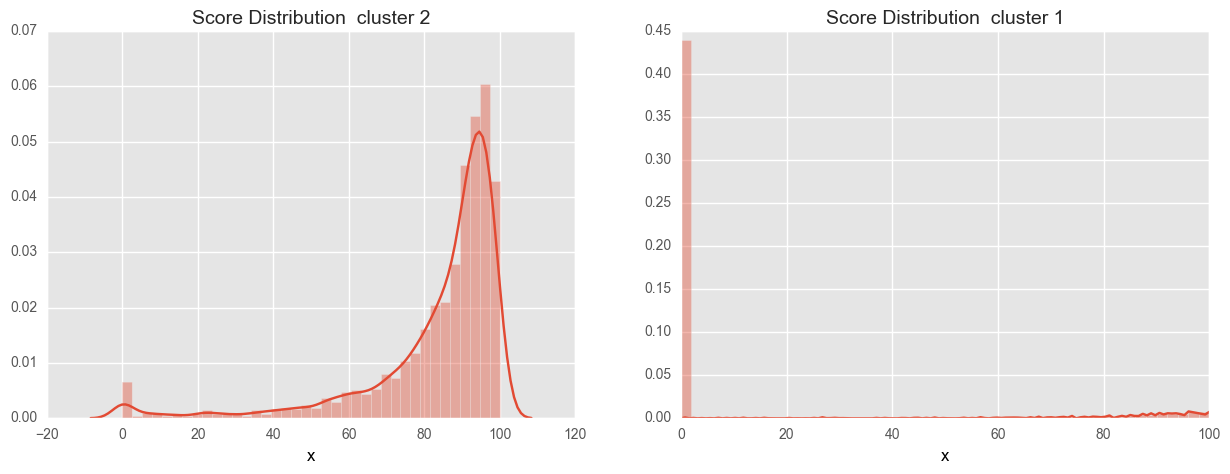

In [189]:
fig, axs = plt.subplots(1,2,figsize=(15, 5))
fig2, axs2 = plt.subplots(1,2,figsize=(15, 5))

c0 = sns.distplot(df_processed['avg_score'], ax=axs[0])
c0.axes.set_title('Score Distribution  before clustering', fontsize=14)
c0.set_xlabel("x",color="black")

c0 = sns.distplot(df_processed_cluster0['avg_score'], ax=axs[1])
c0.axes.set_title('Score Distribution  cluster 0', fontsize=14)
c0.set_xlabel("x",color="black")

c0 = sns.distplot(df_processed_cluster2['avg_score'], ax=axs2[0])
c0.axes.set_title('Score Distribution  cluster 2', fontsize=14)
c0.set_xlabel("x",color="black")

c0 = sns.distplot(df_processed_cluster1['avg_score'], ax=axs2[1])
c0.axes.set_title('Score Distribution  cluster 1', fontsize=14)
c0.set_xlabel("x",color="black")

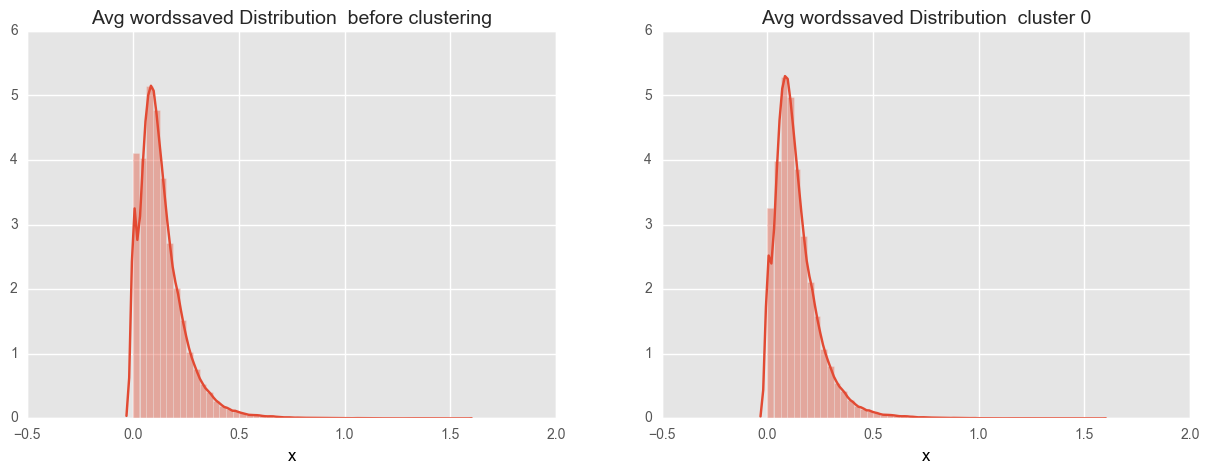

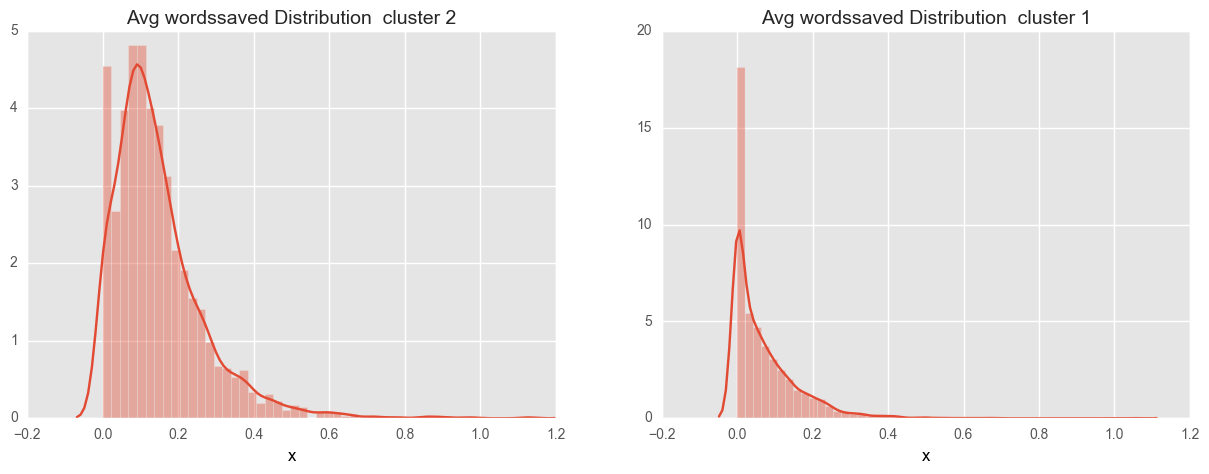

In [190]:
fig, axs = plt.subplots(1,2,figsize=(15, 5))
fig2, axs2 = plt.subplots(1,2,figsize=(15, 5))

c0 = sns.distplot(df_processed['avg_words_saved'], ax=axs[0])
c0.axes.set_title('Avg wordssaved Distribution  before clustering', fontsize=14)
c0.set_xlabel("x",color="black")

c0 = sns.distplot(df_processed_cluster0['avg_words_saved'], ax=axs[1])
c0.axes.set_title('Avg wordssaved Distribution  cluster 0', fontsize=14)
c0.set_xlabel("x",color="black")

c0 = sns.distplot(df_processed_cluster2['avg_words_saved'], ax=axs2[0])
c0.axes.set_title('Avg wordssaved Distribution  cluster 2', fontsize=14)
c0.set_xlabel("x",color="black")

c0 = sns.distplot(df_processed_cluster1['avg_words_saved'], ax=axs2[1])
c0.axes.set_title('Avg wordssaved Distribution  cluster 1', fontsize=14)
c0.set_xlabel("x",color="black")

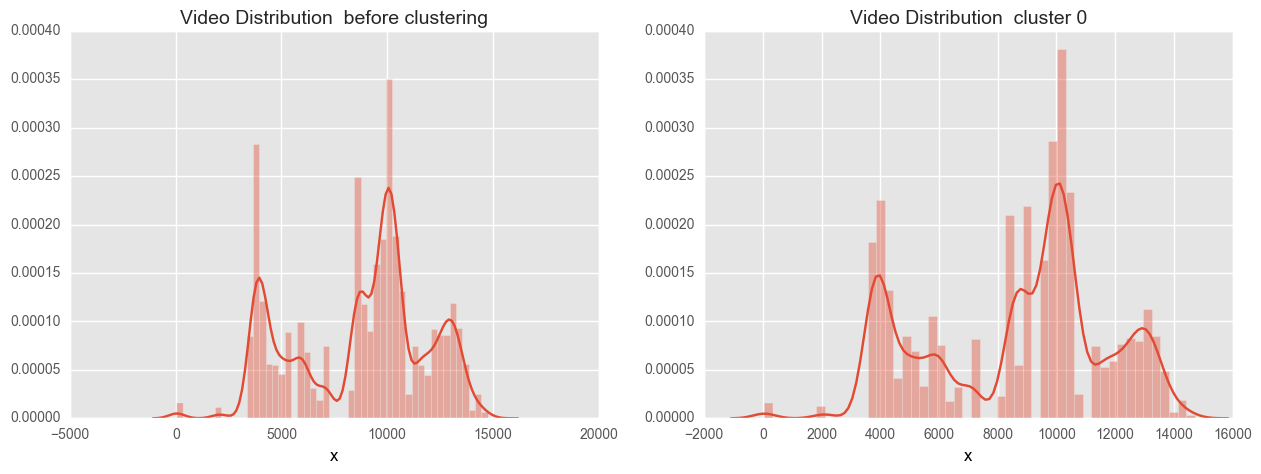

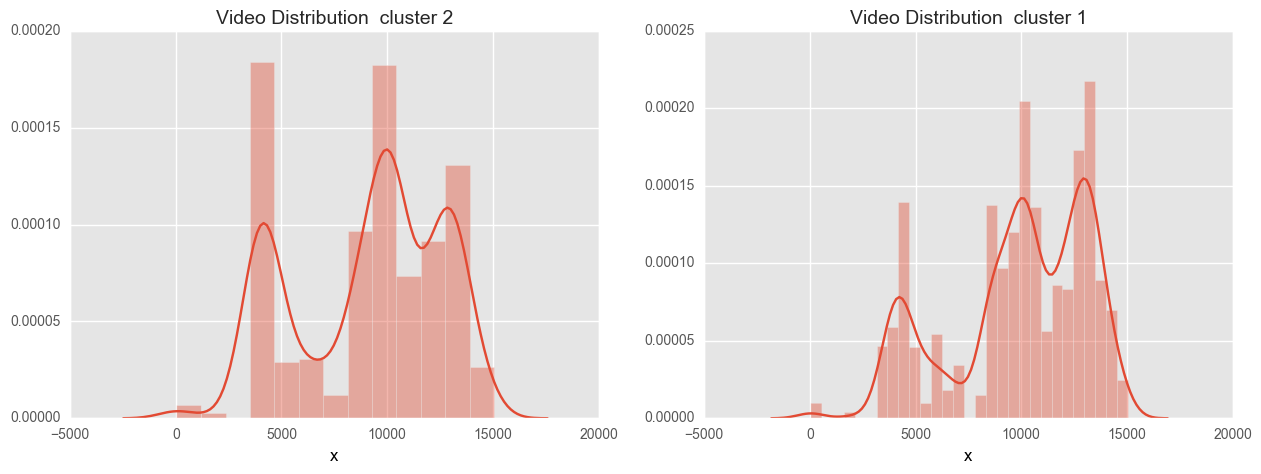

In [211]:
fig, axs = plt.subplots(1,2,figsize=(15, 5))
fig2, axs2 = plt.subplots(1,2,figsize=(15, 5))

c0 = sns.distplot(df_processed['postId'], ax=axs[0])
c0.axes.set_title('Video Distribution  before clustering', fontsize=14)
c0.set_xlabel("x",color="black")

c0 = sns.distplot(df_processed_cluster0['postId'], ax=axs[1])
c0.axes.set_title('Video Distribution  cluster 0', fontsize=14)
c0.set_xlabel("x",color="black")

c0 = sns.distplot(df_processed_cluster2['postId'], ax=axs2[0])
c0.axes.set_title('Video Distribution  cluster 2', fontsize=14)
c0.set_xlabel("x",color="black")

c0 = sns.distplot(df_processed_cluster1['postId'], ax=axs2[1])
c0.axes.set_title('Video Distribution  cluster 1', fontsize=14)
c0.set_xlabel("x",color="black")